3090 - pth-gpu, kernel died

3090 - pth25gpu - OK

In [ ]:
# %run main.py

In [ ]:
%run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.0

Using device: cuda
GPU: NVIDIA GeForce RTX 3090

Loading dataset: CIFAR10
Files already downloaded and verified
Files already downloaded and verified


c:\Users\m.amintoosi\.conda\envs\pth25gpu\lib\site-packages\torch\utils\data\dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Optimizer: Adam

Run 1/5 | seed = 42
Trainable parameters: 545,098


Epoch 1/20:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\training.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 98/98 [01:08<00:00,  1.43it/s] 
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 1.8112 | Train Acc: 34.09% | Test Loss: 1.4848 | Test Acc: 46.43% | Time: 121.45s


Epoch 2/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 2/20 | Train Loss: 1.4840 | Train Acc: 46.18% | Test Loss: 1.3011 | Test Acc: 54.67% | Time: 120.58s


Epoch 3/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 3/20 | Train Loss: 1.3504 | Train Acc: 51.17% | Test Loss: 1.1720 | Test Acc: 58.53% | Time: 120.85s


Epoch 4/20: 100%|██████████| 98/98 [01:08<00:00,  1.44it/s] 


Epoch 4/20 | Train Loss: 1.2614 | Train Acc: 54.88% | Test Loss: 1.1117 | Test Acc: 60.73% | Time: 122.10s


Epoch 5/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 5/20 | Train Loss: 1.1956 | Train Acc: 57.12% | Test Loss: 1.0798 | Test Acc: 62.22% | Time: 122.06s


Epoch 6/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 6/20 | Train Loss: 1.1376 | Train Acc: 59.27% | Test Loss: 0.9911 | Test Acc: 65.62% | Time: 115.47s


Epoch 7/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 7/20 | Train Loss: 1.0912 | Train Acc: 61.07% | Test Loss: 0.9560 | Test Acc: 65.99% | Time: 115.00s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 8/20 | Train Loss: 1.0638 | Train Acc: 62.25% | Test Loss: 0.9086 | Test Acc: 68.59% | Time: 114.60s


Epoch 9/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 9/20 | Train Loss: 1.0293 | Train Acc: 63.46% | Test Loss: 0.8751 | Test Acc: 69.74% | Time: 114.74s


Epoch 10/20: 100%|██████████| 98/98 [01:05<00:00,  1.51it/s] 


Epoch 10/20 | Train Loss: 1.0030 | Train Acc: 64.79% | Test Loss: 0.8972 | Test Acc: 68.75% | Time: 116.31s


Epoch 11/20: 100%|██████████| 98/98 [01:05<00:00,  1.50it/s] 


Epoch 11/20 | Train Loss: 0.9893 | Train Acc: 65.02% | Test Loss: 0.8639 | Test Acc: 69.83% | Time: 117.08s


Epoch 12/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 12/20 | Train Loss: 0.9739 | Train Acc: 65.58% | Test Loss: 0.8355 | Test Acc: 70.97% | Time: 116.84s


Epoch 13/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 13/20 | Train Loss: 0.9486 | Train Acc: 66.50% | Test Loss: 0.8623 | Test Acc: 69.63% | Time: 114.85s


Epoch 14/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 14/20 | Train Loss: 0.9431 | Train Acc: 66.77% | Test Loss: 0.8321 | Test Acc: 71.26% | Time: 115.80s


Epoch 15/20: 100%|██████████| 98/98 [01:04<00:00,  1.51it/s] 


Epoch 15/20 | Train Loss: 0.9243 | Train Acc: 67.32% | Test Loss: 0.8144 | Test Acc: 71.42% | Time: 115.98s


Epoch 16/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 16/20 | Train Loss: 0.9079 | Train Acc: 67.99% | Test Loss: 0.8493 | Test Acc: 70.61% | Time: 114.50s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 17/20 | Train Loss: 0.9044 | Train Acc: 67.98% | Test Loss: 0.7716 | Test Acc: 73.11% | Time: 112.93s


Epoch 18/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 18/20 | Train Loss: 0.8897 | Train Acc: 68.67% | Test Loss: 0.7697 | Test Acc: 72.96% | Time: 113.06s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 19/20 | Train Loss: 0.8682 | Train Acc: 69.16% | Test Loss: 0.7589 | Test Acc: 73.47% | Time: 114.66s


Epoch 20/20: 100%|██████████| 98/98 [01:09<00:00,  1.42it/s] 


Epoch 20/20 | Train Loss: 0.8626 | Train Acc: 69.71% | Test Loss: 0.7518 | Test Acc: 73.82% | Time: 121.57s

Run 2/5 | seed = 43
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 1/20 | Train Loss: 1.7856 | Train Acc: 34.88% | Test Loss: 1.4801 | Test Acc: 46.34% | Time: 118.59s


Epoch 2/20: 100%|██████████| 98/98 [01:07<00:00,  1.46it/s] 


Epoch 2/20 | Train Loss: 1.4789 | Train Acc: 46.25% | Test Loss: 1.3220 | Test Acc: 52.84% | Time: 120.51s


Epoch 3/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 3/20 | Train Loss: 1.3604 | Train Acc: 50.79% | Test Loss: 1.1680 | Test Acc: 58.66% | Time: 118.61s


Epoch 4/20: 100%|██████████| 98/98 [01:07<00:00,  1.44it/s] 


Epoch 4/20 | Train Loss: 1.2696 | Train Acc: 54.36% | Test Loss: 1.1078 | Test Acc: 61.07% | Time: 121.23s


Epoch 5/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 5/20 | Train Loss: 1.2007 | Train Acc: 56.94% | Test Loss: 1.0213 | Test Acc: 64.52% | Time: 121.64s


Epoch 6/20: 100%|██████████| 98/98 [01:06<00:00,  1.47it/s] 


Epoch 6/20 | Train Loss: 1.1409 | Train Acc: 59.14% | Test Loss: 0.9839 | Test Acc: 66.03% | Time: 119.73s


Epoch 7/20: 100%|██████████| 98/98 [01:07<00:00,  1.45it/s] 


Epoch 7/20 | Train Loss: 1.1040 | Train Acc: 60.70% | Test Loss: 0.9574 | Test Acc: 66.46% | Time: 120.80s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 8/20 | Train Loss: 1.0699 | Train Acc: 61.79% | Test Loss: 0.9280 | Test Acc: 67.84% | Time: 114.59s


Epoch 9/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 1.0407 | Train Acc: 62.90% | Test Loss: 0.8936 | Test Acc: 69.13% | Time: 112.28s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 10/20 | Train Loss: 1.0134 | Train Acc: 64.19% | Test Loss: 0.8669 | Test Acc: 69.78% | Time: 112.09s


Epoch 11/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 11/20 | Train Loss: 0.9923 | Train Acc: 65.01% | Test Loss: 0.8671 | Test Acc: 69.69% | Time: 112.42s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 12/20 | Train Loss: 0.9721 | Train Acc: 65.76% | Test Loss: 0.8312 | Test Acc: 70.84% | Time: 112.55s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 13/20 | Train Loss: 0.9539 | Train Acc: 66.22% | Test Loss: 0.8328 | Test Acc: 70.87% | Time: 113.63s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 14/20 | Train Loss: 0.9448 | Train Acc: 66.54% | Test Loss: 0.8153 | Test Acc: 71.79% | Time: 113.75s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 15/20 | Train Loss: 0.9296 | Train Acc: 67.30% | Test Loss: 0.8101 | Test Acc: 71.76% | Time: 113.69s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 16/20 | Train Loss: 0.9133 | Train Acc: 67.92% | Test Loss: 0.7981 | Test Acc: 72.21% | Time: 112.23s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 17/20 | Train Loss: 0.9033 | Train Acc: 68.34% | Test Loss: 0.7763 | Test Acc: 73.24% | Time: 113.24s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 0.8891 | Train Acc: 68.57% | Test Loss: 0.7755 | Test Acc: 73.19% | Time: 112.40s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 19/20 | Train Loss: 0.8732 | Train Acc: 69.01% | Test Loss: 0.7670 | Test Acc: 73.50% | Time: 112.91s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.8581 | Train Acc: 69.75% | Test Loss: 0.7556 | Test Acc: 73.65% | Time: 113.07s

Run 3/5 | seed = 44
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 1/20 | Train Loss: 1.7748 | Train Acc: 35.07% | Test Loss: 1.4371 | Test Acc: 49.20% | Time: 114.18s


Epoch 2/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 2/20 | Train Loss: 1.4721 | Train Acc: 46.61% | Test Loss: 1.2916 | Test Acc: 53.52% | Time: 112.36s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 3/20 | Train Loss: 1.3539 | Train Acc: 51.36% | Test Loss: 1.1762 | Test Acc: 57.94% | Time: 112.87s


Epoch 4/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 4/20 | Train Loss: 1.2721 | Train Acc: 54.23% | Test Loss: 1.0824 | Test Acc: 61.76% | Time: 112.20s


Epoch 5/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 5/20 | Train Loss: 1.2048 | Train Acc: 56.81% | Test Loss: 1.0433 | Test Acc: 63.47% | Time: 112.49s


Epoch 6/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 6/20 | Train Loss: 1.1503 | Train Acc: 58.77% | Test Loss: 0.9722 | Test Acc: 66.09% | Time: 112.09s


Epoch 7/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 7/20 | Train Loss: 1.1057 | Train Acc: 60.54% | Test Loss: 0.9669 | Test Acc: 66.10% | Time: 112.26s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 8/20 | Train Loss: 1.0719 | Train Acc: 62.21% | Test Loss: 0.9037 | Test Acc: 68.61% | Time: 112.57s


Epoch 9/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 1.0456 | Train Acc: 62.81% | Test Loss: 0.9223 | Test Acc: 67.99% | Time: 112.16s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 1.0166 | Train Acc: 64.07% | Test Loss: 0.8692 | Test Acc: 69.99% | Time: 112.15s


Epoch 11/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 11/20 | Train Loss: 0.9915 | Train Acc: 64.73% | Test Loss: 0.8521 | Test Acc: 70.31% | Time: 111.98s


Epoch 12/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 12/20 | Train Loss: 0.9694 | Train Acc: 65.78% | Test Loss: 0.8484 | Test Acc: 70.41% | Time: 112.62s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 13/20 | Train Loss: 0.9556 | Train Acc: 66.22% | Test Loss: 0.8232 | Test Acc: 71.60% | Time: 112.29s


Epoch 14/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 14/20 | Train Loss: 0.9381 | Train Acc: 66.86% | Test Loss: 0.8296 | Test Acc: 71.43% | Time: 112.27s


Epoch 15/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 15/20 | Train Loss: 0.9170 | Train Acc: 67.45% | Test Loss: 0.8134 | Test Acc: 71.94% | Time: 112.16s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 16/20 | Train Loss: 0.9028 | Train Acc: 68.14% | Test Loss: 0.7854 | Test Acc: 72.57% | Time: 113.11s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 17/20 | Train Loss: 0.8940 | Train Acc: 68.68% | Test Loss: 0.7742 | Test Acc: 73.02% | Time: 113.36s


Epoch 18/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 18/20 | Train Loss: 0.8722 | Train Acc: 69.37% | Test Loss: 0.7669 | Test Acc: 73.58% | Time: 114.19s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 19/20 | Train Loss: 0.8703 | Train Acc: 69.40% | Test Loss: 0.7650 | Test Acc: 73.19% | Time: 114.58s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 20/20 | Train Loss: 0.8573 | Train Acc: 69.91% | Test Loss: 0.7488 | Test Acc: 73.63% | Time: 112.61s

Run 4/5 | seed = 45
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 1/20 | Train Loss: 1.7717 | Train Acc: 35.68% | Test Loss: 1.4497 | Test Acc: 48.30% | Time: 112.84s


Epoch 2/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 2/20 | Train Loss: 1.4726 | Train Acc: 46.88% | Test Loss: 1.2715 | Test Acc: 55.44% | Time: 112.24s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/20 | Train Loss: 1.3550 | Train Acc: 51.21% | Test Loss: 1.1932 | Test Acc: 57.20% | Time: 113.93s


Epoch 4/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 4/20 | Train Loss: 1.2630 | Train Acc: 54.69% | Test Loss: 1.0952 | Test Acc: 61.73% | Time: 112.32s


Epoch 5/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 5/20 | Train Loss: 1.1933 | Train Acc: 57.35% | Test Loss: 1.0524 | Test Acc: 62.69% | Time: 112.51s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 6/20 | Train Loss: 1.1558 | Train Acc: 59.20% | Test Loss: 1.0049 | Test Acc: 64.65% | Time: 112.89s


Epoch 7/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 7/20 | Train Loss: 1.1126 | Train Acc: 60.58% | Test Loss: 0.9690 | Test Acc: 66.12% | Time: 112.24s


Epoch 8/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 8/20 | Train Loss: 1.0727 | Train Acc: 61.82% | Test Loss: 0.9397 | Test Acc: 67.15% | Time: 112.59s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 9/20 | Train Loss: 1.0468 | Train Acc: 62.95% | Test Loss: 0.9004 | Test Acc: 68.71% | Time: 112.91s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 1.0176 | Train Acc: 64.07% | Test Loss: 0.9049 | Test Acc: 68.46% | Time: 112.38s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/20 | Train Loss: 0.9949 | Train Acc: 64.96% | Test Loss: 0.8706 | Test Acc: 69.75% | Time: 112.67s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 12/20 | Train Loss: 0.9785 | Train Acc: 65.75% | Test Loss: 0.8892 | Test Acc: 68.82% | Time: 114.34s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 13/20 | Train Loss: 0.9636 | Train Acc: 66.23% | Test Loss: 0.8239 | Test Acc: 71.58% | Time: 111.95s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 0.9446 | Train Acc: 66.80% | Test Loss: 0.8018 | Test Acc: 71.92% | Time: 112.92s


Epoch 15/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 15/20 | Train Loss: 0.9264 | Train Acc: 67.52% | Test Loss: 0.8111 | Test Acc: 72.09% | Time: 112.65s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 16/20 | Train Loss: 0.9175 | Train Acc: 67.75% | Test Loss: 0.7998 | Test Acc: 72.51% | Time: 112.62s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 17/20 | Train Loss: 0.9059 | Train Acc: 68.12% | Test Loss: 0.7746 | Test Acc: 73.03% | Time: 114.06s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 0.8849 | Train Acc: 69.14% | Test Loss: 0.7612 | Test Acc: 73.96% | Time: 112.37s


Epoch 19/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 19/20 | Train Loss: 0.8755 | Train Acc: 69.16% | Test Loss: 0.7606 | Test Acc: 73.52% | Time: 114.37s


Epoch 20/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 20/20 | Train Loss: 0.8624 | Train Acc: 69.81% | Test Loss: 0.7384 | Test Acc: 74.50% | Time: 112.33s

Run 5/5 | seed = 46
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 1/20 | Train Loss: 1.7684 | Train Acc: 35.45% | Test Loss: 1.4416 | Test Acc: 48.39% | Time: 112.38s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4728 | Train Acc: 46.62% | Test Loss: 1.2748 | Test Acc: 54.46% | Time: 113.71s


Epoch 3/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 3/20 | Train Loss: 1.3572 | Train Acc: 50.95% | Test Loss: 1.1929 | Test Acc: 58.07% | Time: 112.27s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/20 | Train Loss: 1.2608 | Train Acc: 54.79% | Test Loss: 1.0899 | Test Acc: 61.65% | Time: 112.65s


Epoch 5/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 5/20 | Train Loss: 1.1980 | Train Acc: 57.31% | Test Loss: 1.0465 | Test Acc: 62.95% | Time: 112.58s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 6/20 | Train Loss: 1.1480 | Train Acc: 59.13% | Test Loss: 0.9850 | Test Acc: 65.60% | Time: 114.36s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 7/20 | Train Loss: 1.1128 | Train Acc: 60.41% | Test Loss: 0.9484 | Test Acc: 67.38% | Time: 111.92s


Epoch 8/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 8/20 | Train Loss: 1.0746 | Train Acc: 61.68% | Test Loss: 0.9345 | Test Acc: 67.31% | Time: 111.99s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 1.0501 | Train Acc: 62.93% | Test Loss: 0.9019 | Test Acc: 68.71% | Time: 112.56s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 1.0233 | Train Acc: 63.63% | Test Loss: 0.8990 | Test Acc: 68.14% | Time: 112.15s


Epoch 11/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 11/20 | Train Loss: 0.9988 | Train Acc: 64.65% | Test Loss: 0.8563 | Test Acc: 69.85% | Time: 112.22s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 12/20 | Train Loss: 0.9854 | Train Acc: 65.21% | Test Loss: 0.8651 | Test Acc: 69.16% | Time: 112.22s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 13/20 | Train Loss: 0.9579 | Train Acc: 66.17% | Test Loss: 0.8321 | Test Acc: 70.89% | Time: 112.46s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 0.9478 | Train Acc: 66.63% | Test Loss: 0.8481 | Test Acc: 70.23% | Time: 114.80s


Epoch 15/20: 100%|██████████| 98/98 [01:06<00:00,  1.48it/s] 


Epoch 15/20 | Train Loss: 0.9347 | Train Acc: 66.92% | Test Loss: 0.7981 | Test Acc: 72.00% | Time: 115.43s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.57it/s] 


Epoch 16/20 | Train Loss: 0.9209 | Train Acc: 67.37% | Test Loss: 0.7919 | Test Acc: 72.49% | Time: 112.00s


Epoch 17/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 17/20 | Train Loss: 0.9044 | Train Acc: 68.05% | Test Loss: 0.7928 | Test Acc: 72.17% | Time: 112.56s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 0.8980 | Train Acc: 68.17% | Test Loss: 0.7798 | Test Acc: 72.97% | Time: 112.50s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 19/20 | Train Loss: 0.8872 | Train Acc: 68.86% | Test Loss: 0.7778 | Test Acc: 72.72% | Time: 114.52s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.8733 | Train Acc: 69.19% | Test Loss: 0.7810 | Test Acc: 72.76% | Time: 114.02s

Optimizer: SR-Adam (Conv-only, Adaptive)

Run 1/5 | seed = 42
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 1/20 | Train Loss: 1.8373 | Train Acc: 33.09% | Test Loss: 1.4926 | Test Acc: 45.63% | Time: 113.92s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4786 | Train Acc: 46.51% | Test Loss: 1.2781 | Test Acc: 53.90% | Time: 113.04s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 3/20 | Train Loss: 1.3143 | Train Acc: 52.49% | Test Loss: 1.1160 | Test Acc: 60.19% | Time: 112.45s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 4/20 | Train Loss: 1.2010 | Train Acc: 56.62% | Test Loss: 1.0038 | Test Acc: 64.31% | Time: 115.07s


Epoch 5/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 5/20 | Train Loss: 1.1147 | Train Acc: 59.95% | Test Loss: 0.9588 | Test Acc: 65.78% | Time: 114.70s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 6/20 | Train Loss: 1.0582 | Train Acc: 62.55% | Test Loss: 0.8921 | Test Acc: 69.02% | Time: 114.35s


Epoch 7/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 7/20 | Train Loss: 1.0133 | Train Acc: 64.07% | Test Loss: 0.8646 | Test Acc: 70.15% | Time: 112.45s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 8/20 | Train Loss: 0.9746 | Train Acc: 65.47% | Test Loss: 0.8450 | Test Acc: 70.72% | Time: 112.57s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 9/20 | Train Loss: 0.9480 | Train Acc: 66.57% | Test Loss: 0.8023 | Test Acc: 72.26% | Time: 112.53s


Epoch 10/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 10/20 | Train Loss: 0.9160 | Train Acc: 67.76% | Test Loss: 0.8078 | Test Acc: 72.12% | Time: 112.57s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/20 | Train Loss: 0.9000 | Train Acc: 68.29% | Test Loss: 0.7755 | Test Acc: 73.24% | Time: 112.92s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 12/20 | Train Loss: 0.8793 | Train Acc: 69.00% | Test Loss: 0.7594 | Test Acc: 73.71% | Time: 114.28s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 13/20 | Train Loss: 0.8669 | Train Acc: 69.45% | Test Loss: 0.7572 | Test Acc: 73.32% | Time: 113.03s


Epoch 14/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 14/20 | Train Loss: 0.8542 | Train Acc: 69.82% | Test Loss: 0.7412 | Test Acc: 74.01% | Time: 112.48s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 15/20 | Train Loss: 0.8336 | Train Acc: 70.51% | Test Loss: 0.7273 | Test Acc: 74.51% | Time: 112.93s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 16/20 | Train Loss: 0.8285 | Train Acc: 70.75% | Test Loss: 0.7318 | Test Acc: 74.62% | Time: 112.55s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 17/20 | Train Loss: 0.8159 | Train Acc: 71.24% | Test Loss: 0.7153 | Test Acc: 74.99% | Time: 112.52s


Epoch 18/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 18/20 | Train Loss: 0.8142 | Train Acc: 71.47% | Test Loss: 0.7111 | Test Acc: 75.26% | Time: 112.91s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 19/20 | Train Loss: 0.7965 | Train Acc: 72.15% | Test Loss: 0.7025 | Test Acc: 75.31% | Time: 113.77s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 20/20 | Train Loss: 0.7765 | Train Acc: 72.68% | Test Loss: 0.6941 | Test Acc: 75.79% | Time: 112.86s

Run 2/5 | seed = 43
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 1/20 | Train Loss: 1.8278 | Train Acc: 33.30% | Test Loss: 1.5071 | Test Acc: 45.57% | Time: 114.60s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 2/20 | Train Loss: 1.4815 | Train Acc: 45.77% | Test Loss: 1.2706 | Test Acc: 53.99% | Time: 113.62s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 3/20 | Train Loss: 1.3315 | Train Acc: 51.61% | Test Loss: 1.1339 | Test Acc: 59.26% | Time: 112.71s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/20 | Train Loss: 1.2112 | Train Acc: 56.34% | Test Loss: 1.0282 | Test Acc: 63.48% | Time: 113.90s


Epoch 5/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 5/20 | Train Loss: 1.1319 | Train Acc: 59.51% | Test Loss: 0.9652 | Test Acc: 65.71% | Time: 112.89s


Epoch 6/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 6/20 | Train Loss: 1.0612 | Train Acc: 62.13% | Test Loss: 0.9106 | Test Acc: 67.71% | Time: 112.46s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 7/20 | Train Loss: 1.0247 | Train Acc: 63.61% | Test Loss: 0.8889 | Test Acc: 69.00% | Time: 112.68s


Epoch 8/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 8/20 | Train Loss: 0.9869 | Train Acc: 64.90% | Test Loss: 0.8671 | Test Acc: 68.99% | Time: 112.51s


Epoch 9/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 0.9670 | Train Acc: 65.93% | Test Loss: 0.8571 | Test Acc: 70.15% | Time: 112.27s


Epoch 10/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 10/20 | Train Loss: 0.9353 | Train Acc: 67.21% | Test Loss: 0.8008 | Test Acc: 71.92% | Time: 112.39s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 11/20 | Train Loss: 0.9094 | Train Acc: 67.73% | Test Loss: 0.7987 | Test Acc: 72.47% | Time: 112.29s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 12/20 | Train Loss: 0.8879 | Train Acc: 68.80% | Test Loss: 0.7788 | Test Acc: 72.96% | Time: 112.46s


Epoch 13/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 13/20 | Train Loss: 0.8691 | Train Acc: 69.52% | Test Loss: 0.7543 | Test Acc: 73.37% | Time: 113.62s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 14/20 | Train Loss: 0.8547 | Train Acc: 69.91% | Test Loss: 0.7522 | Test Acc: 73.30% | Time: 113.26s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 15/20 | Train Loss: 0.8477 | Train Acc: 70.24% | Test Loss: 0.7298 | Test Acc: 74.96% | Time: 112.59s


Epoch 16/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 16/20 | Train Loss: 0.8318 | Train Acc: 70.83% | Test Loss: 0.7300 | Test Acc: 74.95% | Time: 112.46s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 17/20 | Train Loss: 0.8272 | Train Acc: 70.82% | Test Loss: 0.7140 | Test Acc: 75.05% | Time: 113.73s


Epoch 18/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 18/20 | Train Loss: 0.8026 | Train Acc: 71.87% | Test Loss: 0.7175 | Test Acc: 75.26% | Time: 113.90s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 19/20 | Train Loss: 0.7882 | Train Acc: 72.31% | Test Loss: 0.7127 | Test Acc: 75.29% | Time: 113.63s


Epoch 20/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 20/20 | Train Loss: 0.7886 | Train Acc: 72.25% | Test Loss: 0.6984 | Test Acc: 75.73% | Time: 112.59s

Run 3/5 | seed = 44
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:05<00:00,  1.49it/s] 


Epoch 1/20 | Train Loss: 1.8113 | Train Acc: 33.61% | Test Loss: 1.4386 | Test Acc: 48.69% | Time: 116.02s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4720 | Train Acc: 46.54% | Test Loss: 1.2501 | Test Acc: 55.09% | Time: 112.70s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/20 | Train Loss: 1.3218 | Train Acc: 52.24% | Test Loss: 1.1128 | Test Acc: 59.78% | Time: 113.87s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/20 | Train Loss: 1.2043 | Train Acc: 56.73% | Test Loss: 0.9934 | Test Acc: 64.62% | Time: 112.64s


Epoch 5/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 5/20 | Train Loss: 1.1131 | Train Acc: 60.17% | Test Loss: 0.9747 | Test Acc: 65.86% | Time: 112.83s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 6/20 | Train Loss: 1.0561 | Train Acc: 62.58% | Test Loss: 0.9025 | Test Acc: 67.91% | Time: 113.73s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 7/20 | Train Loss: 1.0087 | Train Acc: 64.09% | Test Loss: 0.8923 | Test Acc: 68.98% | Time: 113.85s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 8/20 | Train Loss: 0.9735 | Train Acc: 65.49% | Test Loss: 0.8373 | Test Acc: 70.55% | Time: 112.57s


Epoch 9/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 0.9484 | Train Acc: 66.56% | Test Loss: 0.8241 | Test Acc: 71.02% | Time: 112.56s


Epoch 10/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 10/20 | Train Loss: 0.9289 | Train Acc: 67.28% | Test Loss: 0.8140 | Test Acc: 71.12% | Time: 114.00s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/20 | Train Loss: 0.9048 | Train Acc: 67.93% | Test Loss: 0.7970 | Test Acc: 72.37% | Time: 112.91s


Epoch 12/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 12/20 | Train Loss: 0.8833 | Train Acc: 68.81% | Test Loss: 0.7740 | Test Acc: 73.08% | Time: 112.65s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 13/20 | Train Loss: 0.8733 | Train Acc: 69.28% | Test Loss: 0.7611 | Test Acc: 73.79% | Time: 112.33s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 14/20 | Train Loss: 0.8617 | Train Acc: 69.54% | Test Loss: 0.7800 | Test Acc: 72.46% | Time: 113.79s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 15/20 | Train Loss: 0.8384 | Train Acc: 70.46% | Test Loss: 0.7646 | Test Acc: 73.27% | Time: 112.65s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 16/20 | Train Loss: 0.8331 | Train Acc: 70.79% | Test Loss: 0.7527 | Test Acc: 73.64% | Time: 113.94s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 17/20 | Train Loss: 0.8219 | Train Acc: 71.06% | Test Loss: 0.7354 | Test Acc: 74.43% | Time: 112.55s


Epoch 18/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 18/20 | Train Loss: 0.8053 | Train Acc: 71.78% | Test Loss: 0.7280 | Test Acc: 74.69% | Time: 112.50s


Epoch 19/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 19/20 | Train Loss: 0.7944 | Train Acc: 72.00% | Test Loss: 0.7195 | Test Acc: 74.92% | Time: 113.55s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.7925 | Train Acc: 72.04% | Test Loss: 0.7215 | Test Acc: 74.98% | Time: 113.75s

Run 4/5 | seed = 45
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 1/20 | Train Loss: 1.7910 | Train Acc: 34.72% | Test Loss: 1.4368 | Test Acc: 48.52% | Time: 117.36s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4542 | Train Acc: 47.25% | Test Loss: 1.2329 | Test Acc: 55.87% | Time: 113.13s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 3/20 | Train Loss: 1.2964 | Train Acc: 53.64% | Test Loss: 1.0993 | Test Acc: 60.80% | Time: 114.37s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 4/20 | Train Loss: 1.1813 | Train Acc: 57.68% | Test Loss: 1.0330 | Test Acc: 62.87% | Time: 112.68s


Epoch 5/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 5/20 | Train Loss: 1.1112 | Train Acc: 60.49% | Test Loss: 0.9528 | Test Acc: 67.65% | Time: 112.29s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 6/20 | Train Loss: 1.0439 | Train Acc: 62.95% | Test Loss: 0.8979 | Test Acc: 68.63% | Time: 114.16s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 7/20 | Train Loss: 1.0012 | Train Acc: 64.57% | Test Loss: 0.8707 | Test Acc: 69.34% | Time: 113.69s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 8/20 | Train Loss: 0.9661 | Train Acc: 65.90% | Test Loss: 0.8376 | Test Acc: 70.63% | Time: 112.60s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.56it/s] 


Epoch 9/20 | Train Loss: 0.9418 | Train Acc: 66.63% | Test Loss: 0.8264 | Test Acc: 71.15% | Time: 112.48s


Epoch 10/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 10/20 | Train Loss: 0.9129 | Train Acc: 67.85% | Test Loss: 0.7853 | Test Acc: 72.69% | Time: 113.04s


Epoch 11/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 11/20 | Train Loss: 0.8979 | Train Acc: 68.48% | Test Loss: 0.7800 | Test Acc: 72.66% | Time: 113.03s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 12/20 | Train Loss: 0.8830 | Train Acc: 68.89% | Test Loss: 0.7653 | Test Acc: 73.23% | Time: 113.38s


Epoch 13/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 13/20 | Train Loss: 0.8593 | Train Acc: 69.70% | Test Loss: 0.7758 | Test Acc: 72.44% | Time: 112.29s


Epoch 14/20: 100%|██████████| 98/98 [01:02<00:00,  1.56it/s] 


Epoch 14/20 | Train Loss: 0.8468 | Train Acc: 70.24% | Test Loss: 0.7459 | Test Acc: 74.16% | Time: 112.31s


Epoch 15/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 15/20 | Train Loss: 0.8356 | Train Acc: 70.38% | Test Loss: 0.7341 | Test Acc: 74.07% | Time: 112.60s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 16/20 | Train Loss: 0.8300 | Train Acc: 70.75% | Test Loss: 0.7223 | Test Acc: 75.06% | Time: 113.99s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.53it/s] 


Epoch 17/20 | Train Loss: 0.8145 | Train Acc: 71.19% | Test Loss: 0.7331 | Test Acc: 74.79% | Time: 115.03s


Epoch 18/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 18/20 | Train Loss: 0.7984 | Train Acc: 71.88% | Test Loss: 0.7268 | Test Acc: 74.89% | Time: 114.17s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 19/20 | Train Loss: 0.7967 | Train Acc: 71.89% | Test Loss: 0.7117 | Test Acc: 75.01% | Time: 113.37s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.7865 | Train Acc: 72.46% | Test Loss: 0.6970 | Test Acc: 75.81% | Time: 113.85s

Run 5/5 | seed = 46
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 1/20 | Train Loss: 1.8015 | Train Acc: 34.21% | Test Loss: 1.4485 | Test Acc: 48.12% | Time: 115.28s


Epoch 2/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 2/20 | Train Loss: 1.4591 | Train Acc: 47.11% | Test Loss: 1.2309 | Test Acc: 55.79% | Time: 112.81s


Epoch 3/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 3/20 | Train Loss: 1.3058 | Train Acc: 52.90% | Test Loss: 1.1307 | Test Acc: 59.93% | Time: 112.57s


Epoch 4/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 4/20 | Train Loss: 1.2027 | Train Acc: 56.89% | Test Loss: 1.0369 | Test Acc: 63.13% | Time: 113.61s


Epoch 5/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 5/20 | Train Loss: 1.1401 | Train Acc: 59.33% | Test Loss: 0.9846 | Test Acc: 65.63% | Time: 113.72s


Epoch 6/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 6/20 | Train Loss: 1.0759 | Train Acc: 61.94% | Test Loss: 0.9230 | Test Acc: 67.39% | Time: 112.98s


Epoch 7/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 7/20 | Train Loss: 1.0313 | Train Acc: 63.22% | Test Loss: 0.8957 | Test Acc: 69.16% | Time: 113.55s


Epoch 8/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 8/20 | Train Loss: 1.0028 | Train Acc: 64.31% | Test Loss: 0.8772 | Test Acc: 69.29% | Time: 112.43s


Epoch 9/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 9/20 | Train Loss: 0.9732 | Train Acc: 65.25% | Test Loss: 0.8309 | Test Acc: 70.94% | Time: 113.55s


Epoch 10/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 10/20 | Train Loss: 0.9438 | Train Acc: 66.64% | Test Loss: 0.8229 | Test Acc: 71.16% | Time: 113.78s


Epoch 11/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 11/20 | Train Loss: 0.9143 | Train Acc: 67.45% | Test Loss: 0.8039 | Test Acc: 72.15% | Time: 115.80s


Epoch 12/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 12/20 | Train Loss: 0.8951 | Train Acc: 68.43% | Test Loss: 0.7826 | Test Acc: 72.50% | Time: 113.42s


Epoch 13/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 13/20 | Train Loss: 0.8806 | Train Acc: 69.08% | Test Loss: 0.7697 | Test Acc: 72.97% | Time: 115.18s


Epoch 14/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 14/20 | Train Loss: 0.8597 | Train Acc: 69.75% | Test Loss: 0.7595 | Test Acc: 73.32% | Time: 113.25s


Epoch 15/20: 100%|██████████| 98/98 [01:04<00:00,  1.52it/s] 


Epoch 15/20 | Train Loss: 0.8548 | Train Acc: 69.93% | Test Loss: 0.7587 | Test Acc: 72.89% | Time: 114.90s


Epoch 16/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 16/20 | Train Loss: 0.8394 | Train Acc: 70.34% | Test Loss: 0.7485 | Test Acc: 73.91% | Time: 114.00s


Epoch 17/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 17/20 | Train Loss: 0.8333 | Train Acc: 70.73% | Test Loss: 0.7361 | Test Acc: 74.22% | Time: 113.73s


Epoch 18/20: 100%|██████████| 98/98 [01:04<00:00,  1.53it/s] 


Epoch 18/20 | Train Loss: 0.8299 | Train Acc: 70.88% | Test Loss: 0.7391 | Test Acc: 74.28% | Time: 113.46s


Epoch 19/20: 100%|██████████| 98/98 [01:03<00:00,  1.55it/s] 


Epoch 19/20 | Train Loss: 0.8167 | Train Acc: 71.06% | Test Loss: 0.7249 | Test Acc: 74.88% | Time: 113.30s


Epoch 20/20: 100%|██████████| 98/98 [01:03<00:00,  1.54it/s] 


Epoch 20/20 | Train Loss: 0.7931 | Train Acc: 72.23% | Test Loss: 0.7149 | Test Acc: 74.80% | Time: 113.74s
Results saved to results_CIFAR10_noise0.05\optimizer_comparison_CIFAR10_batch512_epochs20_noise0.05.xlsx
Config saved to results_CIFAR10_noise0.05\config.json
Multi-run summary saved to results_CIFAR10_noise0.05\summary_statistics.csv
Plot saved to results_CIFAR10_noise0.05/optimizer_comparison.png


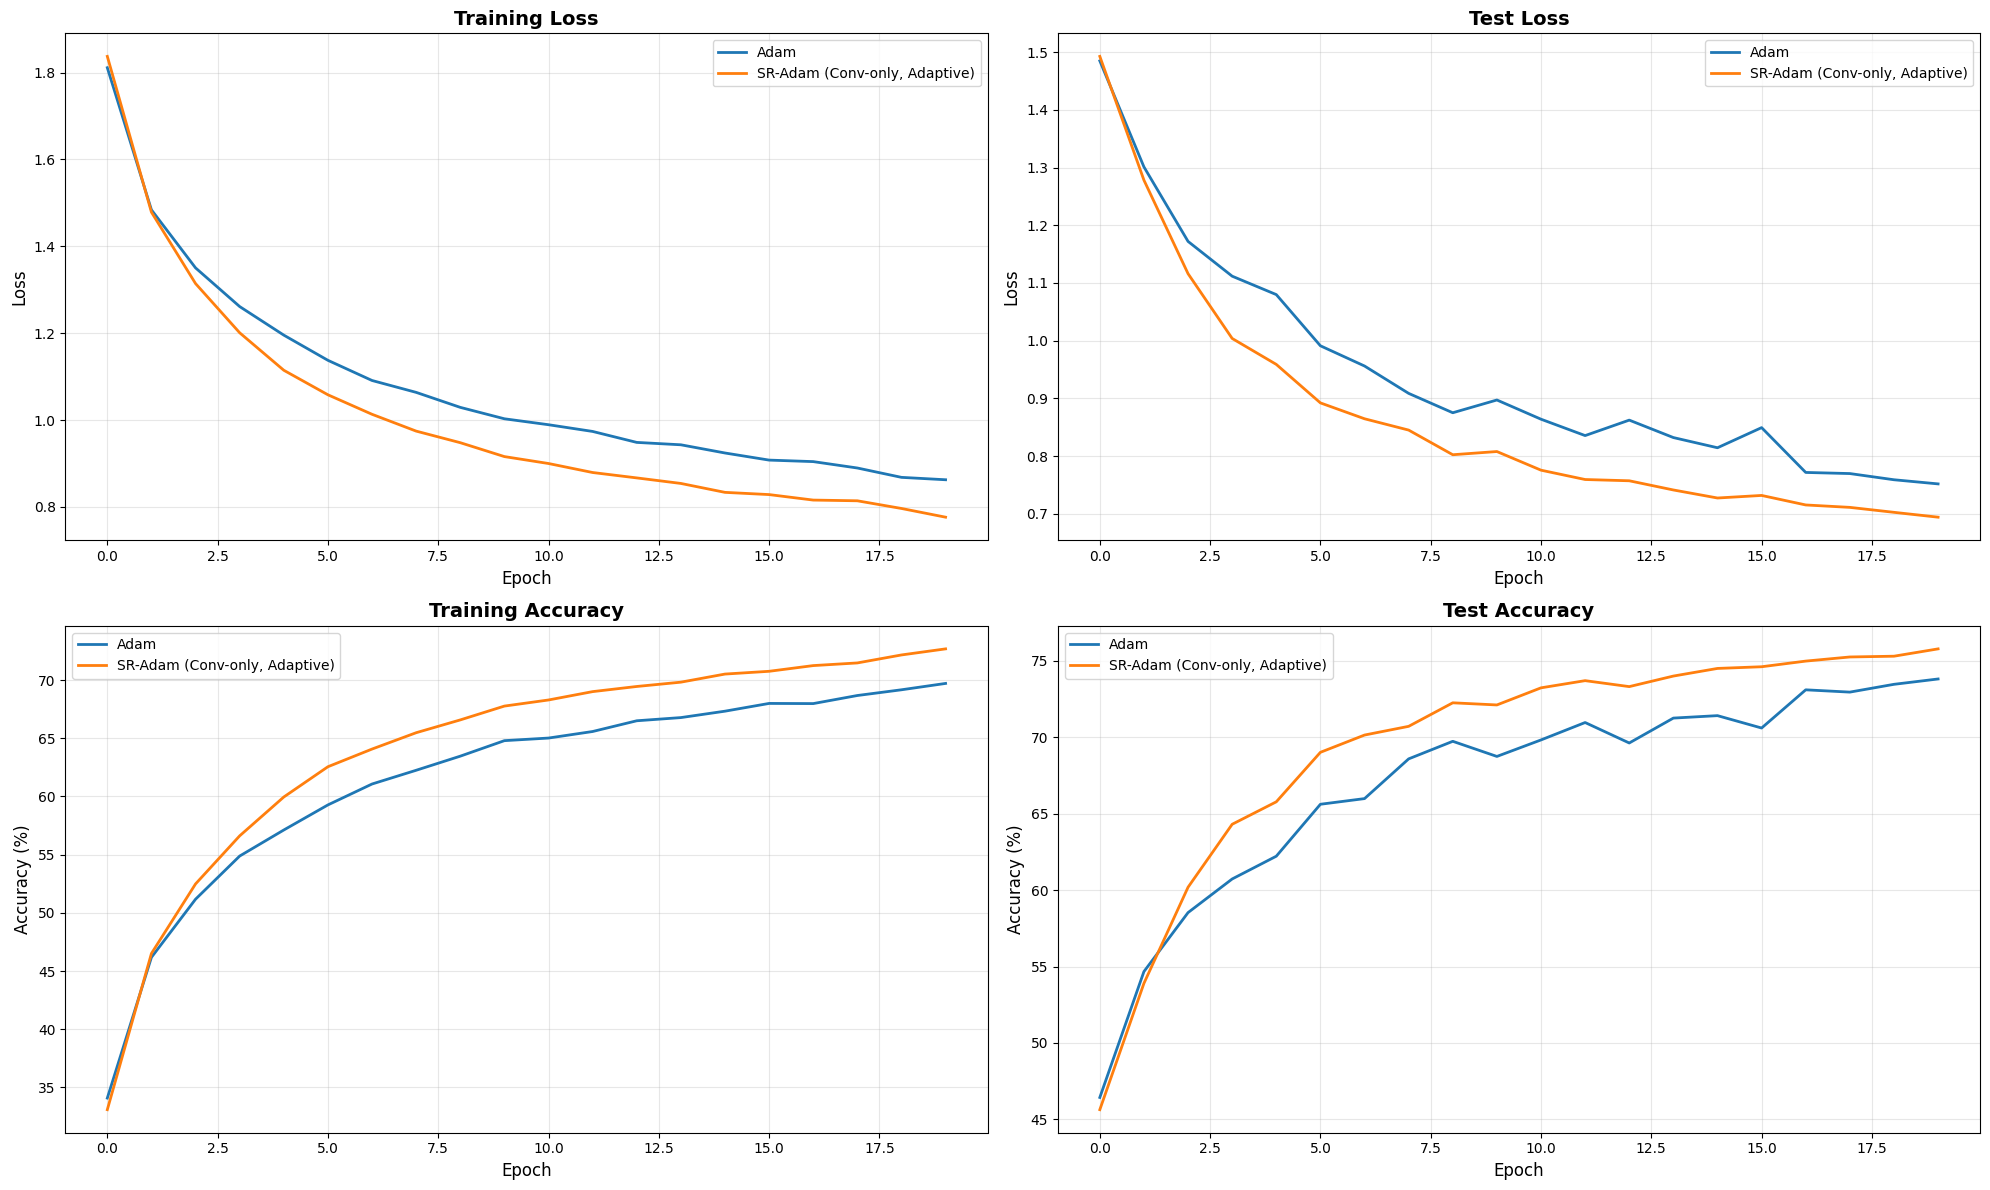


FINAL SUMMARY (mean ± std over runs)
Adam: 73.67 ± 0.56 (best: 73.71 ± 0.49)
SR-Adam (Conv-only, Adaptive): 75.42 ± 0.44 (best: 75.44 ± 0.42)


In [2]:
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.05 \
  --optimizers "adam|sradam"

Using device: cuda
GPU: NVIDIA GeForce RTX 3090

Loading dataset: CIFAR10
Files already downloaded and verified
Files already downloaded and verified


D:\git\mamintoosi-papers-codes\SR-Adam\training.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Optimizer: Adam

Run 1/5 | seed = 42
Trainable parameters: 545,098


Epoch 1/20:   0%|          | 0/98 [00:00<?, ?it/s]D:\git\mamintoosi-papers-codes\SR-Adam\training.py:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/20: 100%|██████████| 98/98 [00:34<00:00,  2.84it/s]
D:\git\mamintoosi-papers-codes\SR-Adam\training.py:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 1.8098 | Train Acc: 34.07% | Test Loss: 1.4877 | Test Acc: 46.70% | Time: 37.76s


Epoch 2/20: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]


Epoch 2/20 | Train Loss: 1.4787 | Train Acc: 46.22% | Test Loss: 1.2965 | Test Acc: 53.65% | Time: 37.07s


Epoch 3/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 3/20 | Train Loss: 1.3602 | Train Acc: 50.91% | Test Loss: 1.2154 | Test Acc: 56.63% | Time: 37.07s


Epoch 4/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 4/20 | Train Loss: 1.2713 | Train Acc: 54.48% | Test Loss: 1.1050 | Test Acc: 60.65% | Time: 36.78s


Epoch 5/20: 100%|██████████| 98/98 [00:33<00:00,  2.91it/s]


Epoch 5/20 | Train Loss: 1.1991 | Train Acc: 56.99% | Test Loss: 1.0601 | Test Acc: 62.72% | Time: 37.17s


Epoch 6/20: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]


Epoch 6/20 | Train Loss: 1.1482 | Train Acc: 59.18% | Test Loss: 1.0010 | Test Acc: 64.73% | Time: 37.20s


Epoch 7/20: 100%|██████████| 98/98 [00:33<00:00,  2.89it/s]


Epoch 7/20 | Train Loss: 1.1040 | Train Acc: 60.60% | Test Loss: 0.9372 | Test Acc: 67.39% | Time: 37.40s


Epoch 8/20: 100%|██████████| 98/98 [00:34<00:00,  2.87it/s]


Epoch 8/20 | Train Loss: 1.0750 | Train Acc: 62.04% | Test Loss: 0.9431 | Test Acc: 66.28% | Time: 37.45s


Epoch 9/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 9/20 | Train Loss: 1.0404 | Train Acc: 62.76% | Test Loss: 0.9032 | Test Acc: 68.96% | Time: 36.77s


Epoch 10/20: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]


Epoch 10/20 | Train Loss: 1.0165 | Train Acc: 64.13% | Test Loss: 0.8809 | Test Acc: 69.18% | Time: 37.84s


Epoch 11/20: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]


Epoch 11/20 | Train Loss: 0.9976 | Train Acc: 64.59% | Test Loss: 0.8989 | Test Acc: 68.70% | Time: 37.67s


Epoch 12/20: 100%|██████████| 98/98 [00:34<00:00,  2.85it/s]


Epoch 12/20 | Train Loss: 0.9757 | Train Acc: 65.24% | Test Loss: 0.8612 | Test Acc: 70.26% | Time: 37.99s


Epoch 13/20: 100%|██████████| 98/98 [00:33<00:00,  2.93it/s]


Epoch 13/20 | Train Loss: 0.9597 | Train Acc: 66.13% | Test Loss: 0.8076 | Test Acc: 72.00% | Time: 36.76s


Epoch 14/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 14/20 | Train Loss: 0.9376 | Train Acc: 66.85% | Test Loss: 0.8493 | Test Acc: 70.25% | Time: 36.85s


Epoch 15/20: 100%|██████████| 98/98 [00:34<00:00,  2.86it/s]


Epoch 15/20 | Train Loss: 0.9299 | Train Acc: 67.19% | Test Loss: 0.7903 | Test Acc: 72.56% | Time: 37.63s


Epoch 16/20: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]


Epoch 16/20 | Train Loss: 0.9175 | Train Acc: 67.63% | Test Loss: 0.7907 | Test Acc: 72.43% | Time: 36.89s


Epoch 17/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 17/20 | Train Loss: 0.8956 | Train Acc: 68.42% | Test Loss: 0.7977 | Test Acc: 72.28% | Time: 36.98s


Epoch 18/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 18/20 | Train Loss: 0.8942 | Train Acc: 68.29% | Test Loss: 0.7811 | Test Acc: 72.97% | Time: 34.77s


Epoch 19/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 19/20 | Train Loss: 0.8840 | Train Acc: 68.85% | Test Loss: 0.7847 | Test Acc: 72.81% | Time: 35.22s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 20/20 | Train Loss: 0.8701 | Train Acc: 69.35% | Test Loss: 0.7673 | Test Acc: 73.61% | Time: 35.05s

Run 2/5 | seed = 43
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 1/20 | Train Loss: 1.7895 | Train Acc: 34.74% | Test Loss: 1.4729 | Test Acc: 46.71% | Time: 35.50s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 2/20 | Train Loss: 1.4788 | Train Acc: 45.97% | Test Loss: 1.2922 | Test Acc: 53.88% | Time: 35.61s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 3/20 | Train Loss: 1.3665 | Train Acc: 50.51% | Test Loss: 1.1698 | Test Acc: 57.96% | Time: 36.11s


Epoch 4/20: 100%|██████████| 98/98 [00:35<00:00,  2.79it/s]


Epoch 4/20 | Train Loss: 1.2561 | Train Acc: 54.85% | Test Loss: 1.0978 | Test Acc: 60.77% | Time: 38.66s


Epoch 5/20: 100%|██████████| 98/98 [00:35<00:00,  2.77it/s]


Epoch 5/20 | Train Loss: 1.1910 | Train Acc: 57.36% | Test Loss: 1.0567 | Test Acc: 62.87% | Time: 38.77s


Epoch 6/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 6/20 | Train Loss: 1.1467 | Train Acc: 59.05% | Test Loss: 0.9994 | Test Acc: 64.71% | Time: 36.09s


Epoch 7/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 7/20 | Train Loss: 1.1063 | Train Acc: 60.61% | Test Loss: 0.9661 | Test Acc: 66.17% | Time: 36.27s


Epoch 8/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 8/20 | Train Loss: 1.0700 | Train Acc: 61.97% | Test Loss: 0.9255 | Test Acc: 67.76% | Time: 36.01s


Epoch 9/20: 100%|██████████| 98/98 [00:34<00:00,  2.82it/s]


Epoch 9/20 | Train Loss: 1.0465 | Train Acc: 62.55% | Test Loss: 0.9290 | Test Acc: 67.49% | Time: 38.06s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 10/20 | Train Loss: 1.0197 | Train Acc: 63.83% | Test Loss: 0.8693 | Test Acc: 69.51% | Time: 35.76s


Epoch 11/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 11/20 | Train Loss: 1.0045 | Train Acc: 64.42% | Test Loss: 0.8851 | Test Acc: 69.46% | Time: 35.81s


Epoch 12/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 12/20 | Train Loss: 0.9808 | Train Acc: 65.45% | Test Loss: 0.8526 | Test Acc: 70.26% | Time: 35.89s


Epoch 13/20: 100%|██████████| 98/98 [00:34<00:00,  2.80it/s]


Epoch 13/20 | Train Loss: 0.9611 | Train Acc: 65.99% | Test Loss: 0.8277 | Test Acc: 71.15% | Time: 38.50s


Epoch 14/20: 100%|██████████| 98/98 [00:37<00:00,  2.64it/s]


Epoch 14/20 | Train Loss: 0.9421 | Train Acc: 66.77% | Test Loss: 0.8330 | Test Acc: 70.87% | Time: 40.63s


Epoch 15/20: 100%|██████████| 98/98 [00:34<00:00,  2.83it/s]


Epoch 15/20 | Train Loss: 0.9348 | Train Acc: 67.02% | Test Loss: 0.8092 | Test Acc: 72.20% | Time: 38.07s


Epoch 16/20: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]


Epoch 16/20 | Train Loss: 0.9253 | Train Acc: 67.45% | Test Loss: 0.8091 | Test Acc: 71.71% | Time: 38.44s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 17/20 | Train Loss: 0.9079 | Train Acc: 68.06% | Test Loss: 0.8151 | Test Acc: 71.29% | Time: 35.40s


Epoch 18/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 18/20 | Train Loss: 0.9026 | Train Acc: 67.95% | Test Loss: 0.7775 | Test Acc: 73.40% | Time: 34.82s


Epoch 19/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 19/20 | Train Loss: 0.8937 | Train Acc: 68.32% | Test Loss: 0.8042 | Test Acc: 71.91% | Time: 34.80s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 20/20 | Train Loss: 0.8893 | Train Acc: 68.56% | Test Loss: 0.7988 | Test Acc: 71.60% | Time: 34.99s

Run 3/5 | seed = 44
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 1/20 | Train Loss: 1.7785 | Train Acc: 35.11% | Test Loss: 1.4519 | Test Acc: 47.51% | Time: 35.59s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 2/20 | Train Loss: 1.4881 | Train Acc: 45.94% | Test Loss: 1.3150 | Test Acc: 52.74% | Time: 35.93s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 3/20 | Train Loss: 1.3688 | Train Acc: 50.38% | Test Loss: 1.2192 | Test Acc: 56.91% | Time: 36.07s


Epoch 4/20: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]


Epoch 4/20 | Train Loss: 1.2754 | Train Acc: 54.20% | Test Loss: 1.1413 | Test Acc: 59.27% | Time: 36.35s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 5/20 | Train Loss: 1.2108 | Train Acc: 56.41% | Test Loss: 1.0197 | Test Acc: 64.55% | Time: 36.20s


Epoch 6/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 6/20 | Train Loss: 1.1546 | Train Acc: 58.78% | Test Loss: 0.9990 | Test Acc: 64.95% | Time: 36.02s


Epoch 7/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 7/20 | Train Loss: 1.1082 | Train Acc: 60.67% | Test Loss: 0.9502 | Test Acc: 66.82% | Time: 35.93s


Epoch 8/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 8/20 | Train Loss: 1.0770 | Train Acc: 61.75% | Test Loss: 0.9534 | Test Acc: 66.57% | Time: 35.78s


Epoch 9/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 9/20 | Train Loss: 1.0462 | Train Acc: 62.78% | Test Loss: 0.9137 | Test Acc: 68.19% | Time: 36.00s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 10/20 | Train Loss: 1.0250 | Train Acc: 63.47% | Test Loss: 0.8840 | Test Acc: 69.06% | Time: 35.89s


Epoch 11/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 11/20 | Train Loss: 0.9998 | Train Acc: 64.56% | Test Loss: 0.8658 | Test Acc: 69.47% | Time: 36.03s


Epoch 12/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 12/20 | Train Loss: 0.9770 | Train Acc: 65.26% | Test Loss: 0.8648 | Test Acc: 69.13% | Time: 35.76s


Epoch 13/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 13/20 | Train Loss: 0.9573 | Train Acc: 65.90% | Test Loss: 0.8267 | Test Acc: 70.82% | Time: 35.98s


Epoch 14/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 14/20 | Train Loss: 0.9400 | Train Acc: 66.93% | Test Loss: 0.8601 | Test Acc: 69.81% | Time: 35.76s


Epoch 15/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 15/20 | Train Loss: 0.9345 | Train Acc: 66.89% | Test Loss: 0.7955 | Test Acc: 72.22% | Time: 35.41s


Epoch 16/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 16/20 | Train Loss: 0.9076 | Train Acc: 67.84% | Test Loss: 0.7938 | Test Acc: 72.32% | Time: 35.36s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 17/20 | Train Loss: 0.9001 | Train Acc: 68.08% | Test Loss: 0.7858 | Test Acc: 72.58% | Time: 35.41s


Epoch 18/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 18/20 | Train Loss: 0.8897 | Train Acc: 68.45% | Test Loss: 0.7720 | Test Acc: 73.02% | Time: 34.91s


Epoch 19/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 19/20 | Train Loss: 0.8778 | Train Acc: 69.03% | Test Loss: 0.7686 | Test Acc: 72.90% | Time: 34.92s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 20/20 | Train Loss: 0.8648 | Train Acc: 69.56% | Test Loss: 0.7709 | Test Acc: 73.33% | Time: 34.87s

Run 4/5 | seed = 45
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:33<00:00,  2.97it/s]


Epoch 1/20 | Train Loss: 1.7718 | Train Acc: 35.54% | Test Loss: 1.4562 | Test Acc: 48.34% | Time: 36.29s


Epoch 2/20: 100%|██████████| 98/98 [00:33<00:00,  2.90it/s]


Epoch 2/20 | Train Loss: 1.4689 | Train Acc: 47.06% | Test Loss: 1.2692 | Test Acc: 55.08% | Time: 37.18s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 3/20 | Train Loss: 1.3511 | Train Acc: 51.26% | Test Loss: 1.1747 | Test Acc: 58.23% | Time: 35.32s


Epoch 4/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 4/20 | Train Loss: 1.2595 | Train Acc: 54.74% | Test Loss: 1.0971 | Test Acc: 61.32% | Time: 35.29s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 5/20 | Train Loss: 1.2078 | Train Acc: 56.84% | Test Loss: 1.0652 | Test Acc: 61.95% | Time: 35.77s


Epoch 6/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 6/20 | Train Loss: 1.1569 | Train Acc: 58.85% | Test Loss: 1.0042 | Test Acc: 64.99% | Time: 35.46s


Epoch 7/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 7/20 | Train Loss: 1.1224 | Train Acc: 60.29% | Test Loss: 0.9581 | Test Acc: 66.98% | Time: 35.56s


Epoch 8/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 8/20 | Train Loss: 1.0858 | Train Acc: 61.55% | Test Loss: 0.9289 | Test Acc: 67.39% | Time: 35.13s


Epoch 9/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 9/20 | Train Loss: 1.0580 | Train Acc: 62.79% | Test Loss: 0.9229 | Test Acc: 67.69% | Time: 35.05s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 10/20 | Train Loss: 1.0381 | Train Acc: 63.15% | Test Loss: 0.8834 | Test Acc: 68.72% | Time: 35.14s


Epoch 11/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 11/20 | Train Loss: 1.0102 | Train Acc: 64.43% | Test Loss: 0.8972 | Test Acc: 68.42% | Time: 34.92s


Epoch 12/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 12/20 | Train Loss: 0.9900 | Train Acc: 65.02% | Test Loss: 0.8615 | Test Acc: 69.92% | Time: 35.18s


Epoch 13/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 13/20 | Train Loss: 0.9731 | Train Acc: 65.64% | Test Loss: 0.8502 | Test Acc: 70.18% | Time: 34.85s


Epoch 14/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 14/20 | Train Loss: 0.9535 | Train Acc: 66.35% | Test Loss: 0.8308 | Test Acc: 70.79% | Time: 34.86s


Epoch 15/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 15/20 | Train Loss: 0.9386 | Train Acc: 67.16% | Test Loss: 0.8133 | Test Acc: 71.62% | Time: 34.92s


Epoch 16/20: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Epoch 16/20 | Train Loss: 0.9256 | Train Acc: 67.38% | Test Loss: 0.8050 | Test Acc: 72.26% | Time: 34.40s


Epoch 17/20: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]


Epoch 17/20 | Train Loss: 0.9032 | Train Acc: 68.23% | Test Loss: 0.7983 | Test Acc: 72.58% | Time: 34.01s


Epoch 18/20: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]


Epoch 18/20 | Train Loss: 0.8862 | Train Acc: 69.14% | Test Loss: 0.7770 | Test Acc: 73.28% | Time: 34.17s


Epoch 19/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 19/20 | Train Loss: 0.8798 | Train Acc: 68.95% | Test Loss: 0.7590 | Test Acc: 73.46% | Time: 35.11s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 20/20 | Train Loss: 0.8738 | Train Acc: 69.30% | Test Loss: 0.7747 | Test Acc: 73.03% | Time: 36.35s

Run 5/5 | seed = 46
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]


Epoch 1/20 | Train Loss: 1.7827 | Train Acc: 34.87% | Test Loss: 1.4369 | Test Acc: 48.82% | Time: 35.89s


Epoch 2/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 2/20 | Train Loss: 1.4705 | Train Acc: 46.78% | Test Loss: 1.2769 | Test Acc: 53.69% | Time: 34.82s


Epoch 3/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 3/20 | Train Loss: 1.3508 | Train Acc: 51.26% | Test Loss: 1.1590 | Test Acc: 58.90% | Time: 35.03s


Epoch 4/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 4/20 | Train Loss: 1.2605 | Train Acc: 54.73% | Test Loss: 1.0808 | Test Acc: 62.24% | Time: 34.76s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 5/20 | Train Loss: 1.1953 | Train Acc: 57.14% | Test Loss: 1.0263 | Test Acc: 63.31% | Time: 35.26s


Epoch 6/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 6/20 | Train Loss: 1.1551 | Train Acc: 58.78% | Test Loss: 0.9786 | Test Acc: 65.50% | Time: 35.04s


Epoch 7/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 7/20 | Train Loss: 1.1170 | Train Acc: 60.04% | Test Loss: 0.9448 | Test Acc: 66.59% | Time: 35.06s


Epoch 8/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 8/20 | Train Loss: 1.0964 | Train Acc: 61.14% | Test Loss: 0.9463 | Test Acc: 66.65% | Time: 35.25s


Epoch 9/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 9/20 | Train Loss: 1.0592 | Train Acc: 62.38% | Test Loss: 0.9269 | Test Acc: 67.14% | Time: 35.17s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 10/20 | Train Loss: 1.0425 | Train Acc: 62.98% | Test Loss: 0.9126 | Test Acc: 67.45% | Time: 35.29s


Epoch 11/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 11/20 | Train Loss: 1.0213 | Train Acc: 63.90% | Test Loss: 0.9008 | Test Acc: 68.43% | Time: 34.96s


Epoch 12/20: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]


Epoch 12/20 | Train Loss: 0.9946 | Train Acc: 64.84% | Test Loss: 0.8585 | Test Acc: 69.76% | Time: 34.78s


Epoch 13/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 13/20 | Train Loss: 0.9837 | Train Acc: 65.46% | Test Loss: 0.8621 | Test Acc: 69.70% | Time: 34.91s


Epoch 14/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 14/20 | Train Loss: 0.9681 | Train Acc: 65.72% | Test Loss: 0.8265 | Test Acc: 70.80% | Time: 35.30s


Epoch 15/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 15/20 | Train Loss: 0.9569 | Train Acc: 66.21% | Test Loss: 0.8380 | Test Acc: 70.01% | Time: 35.07s


Epoch 16/20: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Epoch 16/20 | Train Loss: 0.9369 | Train Acc: 66.97% | Test Loss: 0.8195 | Test Acc: 70.87% | Time: 34.42s


Epoch 17/20: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]


Epoch 17/20 | Train Loss: 0.9257 | Train Acc: 67.38% | Test Loss: 0.8000 | Test Acc: 71.84% | Time: 34.27s


Epoch 18/20: 100%|██████████| 98/98 [00:32<00:00,  2.99it/s]


Epoch 18/20 | Train Loss: 0.9152 | Train Acc: 67.87% | Test Loss: 0.7974 | Test Acc: 71.86% | Time: 36.08s


Epoch 19/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 19/20 | Train Loss: 0.8967 | Train Acc: 68.36% | Test Loss: 0.7908 | Test Acc: 72.21% | Time: 36.21s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 20/20 | Train Loss: 0.8954 | Train Acc: 68.40% | Test Loss: 0.8088 | Test Acc: 71.39% | Time: 35.23s

Optimizer: SR-Adam (Conv-only, Adaptive)

Run 1/5 | seed = 42
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 1/20 | Train Loss: 1.8391 | Train Acc: 32.98% | Test Loss: 1.4811 | Test Acc: 46.52% | Time: 35.23s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 2/20 | Train Loss: 1.4866 | Train Acc: 46.07% | Test Loss: 1.2753 | Test Acc: 54.58% | Time: 35.30s


Epoch 3/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 3/20 | Train Loss: 1.3473 | Train Acc: 51.36% | Test Loss: 1.1593 | Test Acc: 57.91% | Time: 35.05s


Epoch 4/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 4/20 | Train Loss: 1.2425 | Train Acc: 54.99% | Test Loss: 1.0578 | Test Acc: 62.36% | Time: 35.22s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 5/20 | Train Loss: 1.1646 | Train Acc: 58.02% | Test Loss: 1.0090 | Test Acc: 64.28% | Time: 35.24s


Epoch 6/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 6/20 | Train Loss: 1.1085 | Train Acc: 60.26% | Test Loss: 0.9533 | Test Acc: 66.28% | Time: 35.11s


Epoch 7/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 7/20 | Train Loss: 1.0517 | Train Acc: 62.22% | Test Loss: 0.8928 | Test Acc: 68.38% | Time: 35.35s


Epoch 8/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 8/20 | Train Loss: 1.0127 | Train Acc: 63.91% | Test Loss: 0.8511 | Test Acc: 70.35% | Time: 35.45s


Epoch 9/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 9/20 | Train Loss: 0.9953 | Train Acc: 64.60% | Test Loss: 0.8644 | Test Acc: 70.14% | Time: 35.22s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 10/20 | Train Loss: 0.9612 | Train Acc: 66.12% | Test Loss: 0.8153 | Test Acc: 71.99% | Time: 34.92s


Epoch 11/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 11/20 | Train Loss: 0.9261 | Train Acc: 67.31% | Test Loss: 0.8101 | Test Acc: 71.41% | Time: 34.88s


Epoch 12/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 12/20 | Train Loss: 0.9122 | Train Acc: 67.94% | Test Loss: 0.7923 | Test Acc: 72.57% | Time: 35.23s


Epoch 13/20: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]


Epoch 13/20 | Train Loss: 0.8963 | Train Acc: 68.21% | Test Loss: 0.8199 | Test Acc: 71.33% | Time: 34.32s


Epoch 14/20: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]


Epoch 14/20 | Train Loss: 0.8833 | Train Acc: 69.10% | Test Loss: 0.7685 | Test Acc: 73.23% | Time: 34.48s


Epoch 15/20: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]


Epoch 15/20 | Train Loss: 0.8686 | Train Acc: 69.48% | Test Loss: 0.7628 | Test Acc: 73.76% | Time: 34.26s


Epoch 16/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 16/20 | Train Loss: 0.8609 | Train Acc: 69.92% | Test Loss: 0.7586 | Test Acc: 73.67% | Time: 35.70s


Epoch 17/20: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]


Epoch 17/20 | Train Loss: 0.8493 | Train Acc: 70.12% | Test Loss: 0.7384 | Test Acc: 74.80% | Time: 36.33s


Epoch 18/20: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]


Epoch 18/20 | Train Loss: 0.8313 | Train Acc: 70.94% | Test Loss: 0.7393 | Test Acc: 74.56% | Time: 35.62s


Epoch 19/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 19/20 | Train Loss: 0.8222 | Train Acc: 71.11% | Test Loss: 0.7457 | Test Acc: 73.49% | Time: 35.21s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 20/20 | Train Loss: 0.8226 | Train Acc: 71.09% | Test Loss: 0.7015 | Test Acc: 75.79% | Time: 35.06s

Run 2/5 | seed = 43
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 1/20 | Train Loss: 1.8307 | Train Acc: 33.32% | Test Loss: 1.5111 | Test Acc: 46.42% | Time: 35.27s


Epoch 2/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 2/20 | Train Loss: 1.4849 | Train Acc: 45.70% | Test Loss: 1.2835 | Test Acc: 54.03% | Time: 35.13s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 3/20 | Train Loss: 1.3266 | Train Acc: 52.07% | Test Loss: 1.1556 | Test Acc: 57.87% | Time: 35.20s


Epoch 4/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 4/20 | Train Loss: 1.2128 | Train Acc: 56.44% | Test Loss: 1.0481 | Test Acc: 62.86% | Time: 35.28s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 5/20 | Train Loss: 1.1248 | Train Acc: 59.70% | Test Loss: 0.9591 | Test Acc: 66.09% | Time: 35.25s


Epoch 6/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 6/20 | Train Loss: 1.0676 | Train Acc: 61.81% | Test Loss: 0.9311 | Test Acc: 67.02% | Time: 35.18s


Epoch 7/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 7/20 | Train Loss: 1.0251 | Train Acc: 63.33% | Test Loss: 0.8681 | Test Acc: 70.05% | Time: 35.18s


Epoch 8/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 8/20 | Train Loss: 0.9844 | Train Acc: 65.02% | Test Loss: 0.8629 | Test Acc: 69.81% | Time: 35.24s


Epoch 9/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 9/20 | Train Loss: 0.9635 | Train Acc: 65.81% | Test Loss: 0.8191 | Test Acc: 71.87% | Time: 34.97s


Epoch 10/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 10/20 | Train Loss: 0.9315 | Train Acc: 67.24% | Test Loss: 0.7982 | Test Acc: 72.05% | Time: 35.45s


Epoch 11/20: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]


Epoch 11/20 | Train Loss: 0.9040 | Train Acc: 68.40% | Test Loss: 0.7858 | Test Acc: 72.77% | Time: 34.60s


Epoch 12/20: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]


Epoch 12/20 | Train Loss: 0.8948 | Train Acc: 68.61% | Test Loss: 0.7895 | Test Acc: 72.24% | Time: 34.50s


Epoch 13/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 13/20 | Train Loss: 0.8760 | Train Acc: 69.26% | Test Loss: 0.7526 | Test Acc: 74.02% | Time: 34.81s


Epoch 14/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 14/20 | Train Loss: 0.8571 | Train Acc: 70.00% | Test Loss: 0.7485 | Test Acc: 73.79% | Time: 35.20s


Epoch 15/20: 100%|██████████| 98/98 [00:32<00:00,  2.97it/s]


Epoch 15/20 | Train Loss: 0.8441 | Train Acc: 70.47% | Test Loss: 0.7359 | Test Acc: 74.82% | Time: 36.27s


Epoch 16/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 16/20 | Train Loss: 0.8395 | Train Acc: 70.50% | Test Loss: 0.7400 | Test Acc: 74.69% | Time: 36.10s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 17/20 | Train Loss: 0.8277 | Train Acc: 71.07% | Test Loss: 0.7347 | Test Acc: 74.96% | Time: 35.30s


Epoch 18/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 18/20 | Train Loss: 0.8197 | Train Acc: 71.10% | Test Loss: 0.7142 | Test Acc: 75.46% | Time: 35.18s


Epoch 19/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 19/20 | Train Loss: 0.7967 | Train Acc: 71.99% | Test Loss: 0.7090 | Test Acc: 75.61% | Time: 35.16s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 20/20 | Train Loss: 0.7960 | Train Acc: 72.11% | Test Loss: 0.7337 | Test Acc: 74.86% | Time: 35.21s

Run 3/5 | seed = 44
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 1/20 | Train Loss: 1.8130 | Train Acc: 33.71% | Test Loss: 1.4454 | Test Acc: 48.48% | Time: 35.32s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 2/20 | Train Loss: 1.4751 | Train Acc: 46.63% | Test Loss: 1.2471 | Test Acc: 56.04% | Time: 35.27s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 3/20 | Train Loss: 1.3166 | Train Acc: 52.57% | Test Loss: 1.1273 | Test Acc: 59.78% | Time: 35.21s


Epoch 4/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 4/20 | Train Loss: 1.1906 | Train Acc: 57.01% | Test Loss: 1.0229 | Test Acc: 63.40% | Time: 35.05s


Epoch 5/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 5/20 | Train Loss: 1.1037 | Train Acc: 60.57% | Test Loss: 0.9334 | Test Acc: 67.34% | Time: 35.44s


Epoch 6/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 6/20 | Train Loss: 1.0520 | Train Acc: 62.67% | Test Loss: 0.9073 | Test Acc: 68.27% | Time: 35.23s


Epoch 7/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 7/20 | Train Loss: 1.0025 | Train Acc: 64.45% | Test Loss: 0.8690 | Test Acc: 69.88% | Time: 35.12s


Epoch 8/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 8/20 | Train Loss: 0.9769 | Train Acc: 65.28% | Test Loss: 0.8336 | Test Acc: 71.03% | Time: 35.12s


Epoch 9/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 9/20 | Train Loss: 0.9343 | Train Acc: 66.86% | Test Loss: 0.8080 | Test Acc: 71.88% | Time: 35.12s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Epoch 10/20 | Train Loss: 0.9169 | Train Acc: 67.54% | Test Loss: 0.8064 | Test Acc: 71.63% | Time: 34.45s


Epoch 11/20: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]


Epoch 11/20 | Train Loss: 0.8930 | Train Acc: 68.60% | Test Loss: 0.7901 | Test Acc: 72.14% | Time: 34.41s


Epoch 12/20: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]


Epoch 12/20 | Train Loss: 0.8771 | Train Acc: 68.89% | Test Loss: 0.7626 | Test Acc: 73.70% | Time: 34.53s


Epoch 13/20: 100%|██████████| 98/98 [00:33<00:00,  2.94it/s]


Epoch 13/20 | Train Loss: 0.8586 | Train Acc: 69.77% | Test Loss: 0.7614 | Test Acc: 73.65% | Time: 36.53s


Epoch 14/20: 100%|██████████| 98/98 [00:33<00:00,  2.96it/s]


Epoch 14/20 | Train Loss: 0.8480 | Train Acc: 69.95% | Test Loss: 0.7694 | Test Acc: 73.37% | Time: 36.41s


Epoch 15/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 15/20 | Train Loss: 0.8292 | Train Acc: 70.75% | Test Loss: 0.7503 | Test Acc: 74.40% | Time: 35.51s


Epoch 16/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 16/20 | Train Loss: 0.8164 | Train Acc: 71.17% | Test Loss: 0.7293 | Test Acc: 74.87% | Time: 35.18s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 17/20 | Train Loss: 0.8077 | Train Acc: 71.53% | Test Loss: 0.7346 | Test Acc: 74.14% | Time: 35.29s


Epoch 18/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 18/20 | Train Loss: 0.8014 | Train Acc: 71.79% | Test Loss: 0.7198 | Test Acc: 75.18% | Time: 35.19s


Epoch 19/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 19/20 | Train Loss: 0.7989 | Train Acc: 71.81% | Test Loss: 0.6980 | Test Acc: 75.90% | Time: 35.27s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 20/20 | Train Loss: 0.7749 | Train Acc: 72.62% | Test Loss: 0.7021 | Test Acc: 75.86% | Time: 35.44s

Run 4/5 | seed = 45
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 1/20 | Train Loss: 1.7998 | Train Acc: 34.55% | Test Loss: 1.4566 | Test Acc: 48.21% | Time: 35.17s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 2/20 | Train Loss: 1.4780 | Train Acc: 46.82% | Test Loss: 1.2678 | Test Acc: 54.41% | Time: 35.40s


Epoch 3/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 3/20 | Train Loss: 1.3156 | Train Acc: 52.72% | Test Loss: 1.1230 | Test Acc: 60.21% | Time: 35.32s


Epoch 4/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 4/20 | Train Loss: 1.2082 | Train Acc: 56.47% | Test Loss: 1.0321 | Test Acc: 63.77% | Time: 35.29s


Epoch 5/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 5/20 | Train Loss: 1.1426 | Train Acc: 59.14% | Test Loss: 1.0106 | Test Acc: 64.45% | Time: 35.07s


Epoch 6/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 6/20 | Train Loss: 1.0824 | Train Acc: 61.68% | Test Loss: 0.9401 | Test Acc: 66.98% | Time: 35.03s


Epoch 7/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 7/20 | Train Loss: 1.0465 | Train Acc: 63.20% | Test Loss: 0.9246 | Test Acc: 67.40% | Time: 35.17s


Epoch 8/20: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]


Epoch 8/20 | Train Loss: 1.0167 | Train Acc: 64.06% | Test Loss: 0.8748 | Test Acc: 69.88% | Time: 34.38s


Epoch 9/20: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Epoch 9/20 | Train Loss: 0.9800 | Train Acc: 65.26% | Test Loss: 0.8308 | Test Acc: 70.84% | Time: 34.45s


Epoch 10/20: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]


Epoch 10/20 | Train Loss: 0.9515 | Train Acc: 66.61% | Test Loss: 0.8286 | Test Acc: 70.79% | Time: 34.55s


Epoch 11/20: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]


Epoch 11/20 | Train Loss: 0.9393 | Train Acc: 67.03% | Test Loss: 0.8179 | Test Acc: 71.26% | Time: 35.82s


Epoch 12/20: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]


Epoch 12/20 | Train Loss: 0.9209 | Train Acc: 67.53% | Test Loss: 0.7862 | Test Acc: 72.42% | Time: 36.71s


Epoch 13/20: 100%|██████████| 98/98 [00:32<00:00,  2.98it/s]


Epoch 13/20 | Train Loss: 0.9033 | Train Acc: 68.27% | Test Loss: 0.7905 | Test Acc: 72.13% | Time: 36.17s


Epoch 14/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 14/20 | Train Loss: 0.8851 | Train Acc: 68.84% | Test Loss: 0.7708 | Test Acc: 72.87% | Time: 35.16s


Epoch 15/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 15/20 | Train Loss: 0.8699 | Train Acc: 69.67% | Test Loss: 0.7818 | Test Acc: 73.25% | Time: 35.44s


Epoch 16/20: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]


Epoch 16/20 | Train Loss: 0.8676 | Train Acc: 69.63% | Test Loss: 0.7399 | Test Acc: 74.14% | Time: 35.13s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 17/20 | Train Loss: 0.8566 | Train Acc: 69.78% | Test Loss: 0.7541 | Test Acc: 73.66% | Time: 35.27s


Epoch 18/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 18/20 | Train Loss: 0.8428 | Train Acc: 70.31% | Test Loss: 0.7320 | Test Acc: 74.68% | Time: 35.19s


Epoch 19/20: 100%|██████████| 98/98 [00:34<00:00,  2.82it/s]


Epoch 19/20 | Train Loss: 0.8252 | Train Acc: 71.02% | Test Loss: 0.7116 | Test Acc: 75.38% | Time: 38.00s


Epoch 20/20: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]


Epoch 20/20 | Train Loss: 0.8207 | Train Acc: 71.19% | Test Loss: 0.7087 | Test Acc: 75.36% | Time: 35.44s

Run 5/5 | seed = 46
Trainable parameters: 545,098


Epoch 1/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 1/20 | Train Loss: 1.8197 | Train Acc: 33.40% | Test Loss: 1.4541 | Test Acc: 48.00% | Time: 35.24s


Epoch 2/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 2/20 | Train Loss: 1.4822 | Train Acc: 45.93% | Test Loss: 1.2713 | Test Acc: 54.16% | Time: 35.56s


Epoch 3/20: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]


Epoch 3/20 | Train Loss: 1.3290 | Train Acc: 51.95% | Test Loss: 1.1278 | Test Acc: 60.12% | Time: 34.98s


Epoch 4/20: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]


Epoch 4/20 | Train Loss: 1.2265 | Train Acc: 56.20% | Test Loss: 1.0665 | Test Acc: 62.87% | Time: 34.87s


Epoch 5/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 5/20 | Train Loss: 1.1530 | Train Acc: 58.62% | Test Loss: 1.0021 | Test Acc: 64.42% | Time: 35.20s


Epoch 6/20: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]


Epoch 6/20 | Train Loss: 1.0955 | Train Acc: 61.02% | Test Loss: 0.9302 | Test Acc: 67.60% | Time: 34.65s


Epoch 7/20: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]


Epoch 7/20 | Train Loss: 1.0642 | Train Acc: 62.15% | Test Loss: 0.9510 | Test Acc: 66.66% | Time: 34.67s


Epoch 8/20: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]


Epoch 8/20 | Train Loss: 1.0290 | Train Acc: 63.48% | Test Loss: 0.9108 | Test Acc: 68.20% | Time: 34.50s


Epoch 9/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 9/20 | Train Loss: 0.9927 | Train Acc: 64.83% | Test Loss: 0.8843 | Test Acc: 68.87% | Time: 35.46s


Epoch 10/20: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]


Epoch 10/20 | Train Loss: 0.9746 | Train Acc: 65.46% | Test Loss: 0.8641 | Test Acc: 70.09% | Time: 36.54s


Epoch 11/20: 100%|██████████| 98/98 [00:33<00:00,  2.95it/s]


Epoch 11/20 | Train Loss: 0.9609 | Train Acc: 66.05% | Test Loss: 0.8298 | Test Acc: 71.44% | Time: 36.49s


Epoch 12/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 12/20 | Train Loss: 0.9326 | Train Acc: 67.00% | Test Loss: 0.8112 | Test Acc: 71.64% | Time: 35.43s


Epoch 13/20: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]


Epoch 13/20 | Train Loss: 0.9145 | Train Acc: 67.53% | Test Loss: 0.7948 | Test Acc: 72.14% | Time: 35.46s


Epoch 14/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 14/20 | Train Loss: 0.8989 | Train Acc: 68.24% | Test Loss: 0.7867 | Test Acc: 72.83% | Time: 35.37s


Epoch 15/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 15/20 | Train Loss: 0.8941 | Train Acc: 68.45% | Test Loss: 0.7882 | Test Acc: 72.60% | Time: 35.26s


Epoch 16/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 16/20 | Train Loss: 0.8720 | Train Acc: 69.47% | Test Loss: 0.7663 | Test Acc: 73.31% | Time: 35.37s


Epoch 17/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 17/20 | Train Loss: 0.8560 | Train Acc: 69.75% | Test Loss: 0.7719 | Test Acc: 73.09% | Time: 35.23s


Epoch 18/20: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]


Epoch 18/20 | Train Loss: 0.8484 | Train Acc: 70.14% | Test Loss: 0.7691 | Test Acc: 73.25% | Time: 35.31s


Epoch 19/20: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]


Epoch 19/20 | Train Loss: 0.8374 | Train Acc: 70.28% | Test Loss: 0.7982 | Test Acc: 72.45% | Time: 35.25s


Epoch 20/20: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]


Epoch 20/20 | Train Loss: 0.8339 | Train Acc: 70.59% | Test Loss: 0.7398 | Test Acc: 74.18% | Time: 35.23s
Results saved to results_CIFAR10_noise0.1\optimizer_comparison_CIFAR10_batch512_epochs20_noise0.1.xlsx
Config saved to results_CIFAR10_noise0.1\config.json
Multi-run summary saved to results_CIFAR10_noise0.1\summary_statistics.csv
Plot saved to results_CIFAR10_noise0.1/optimizer_comparison.png


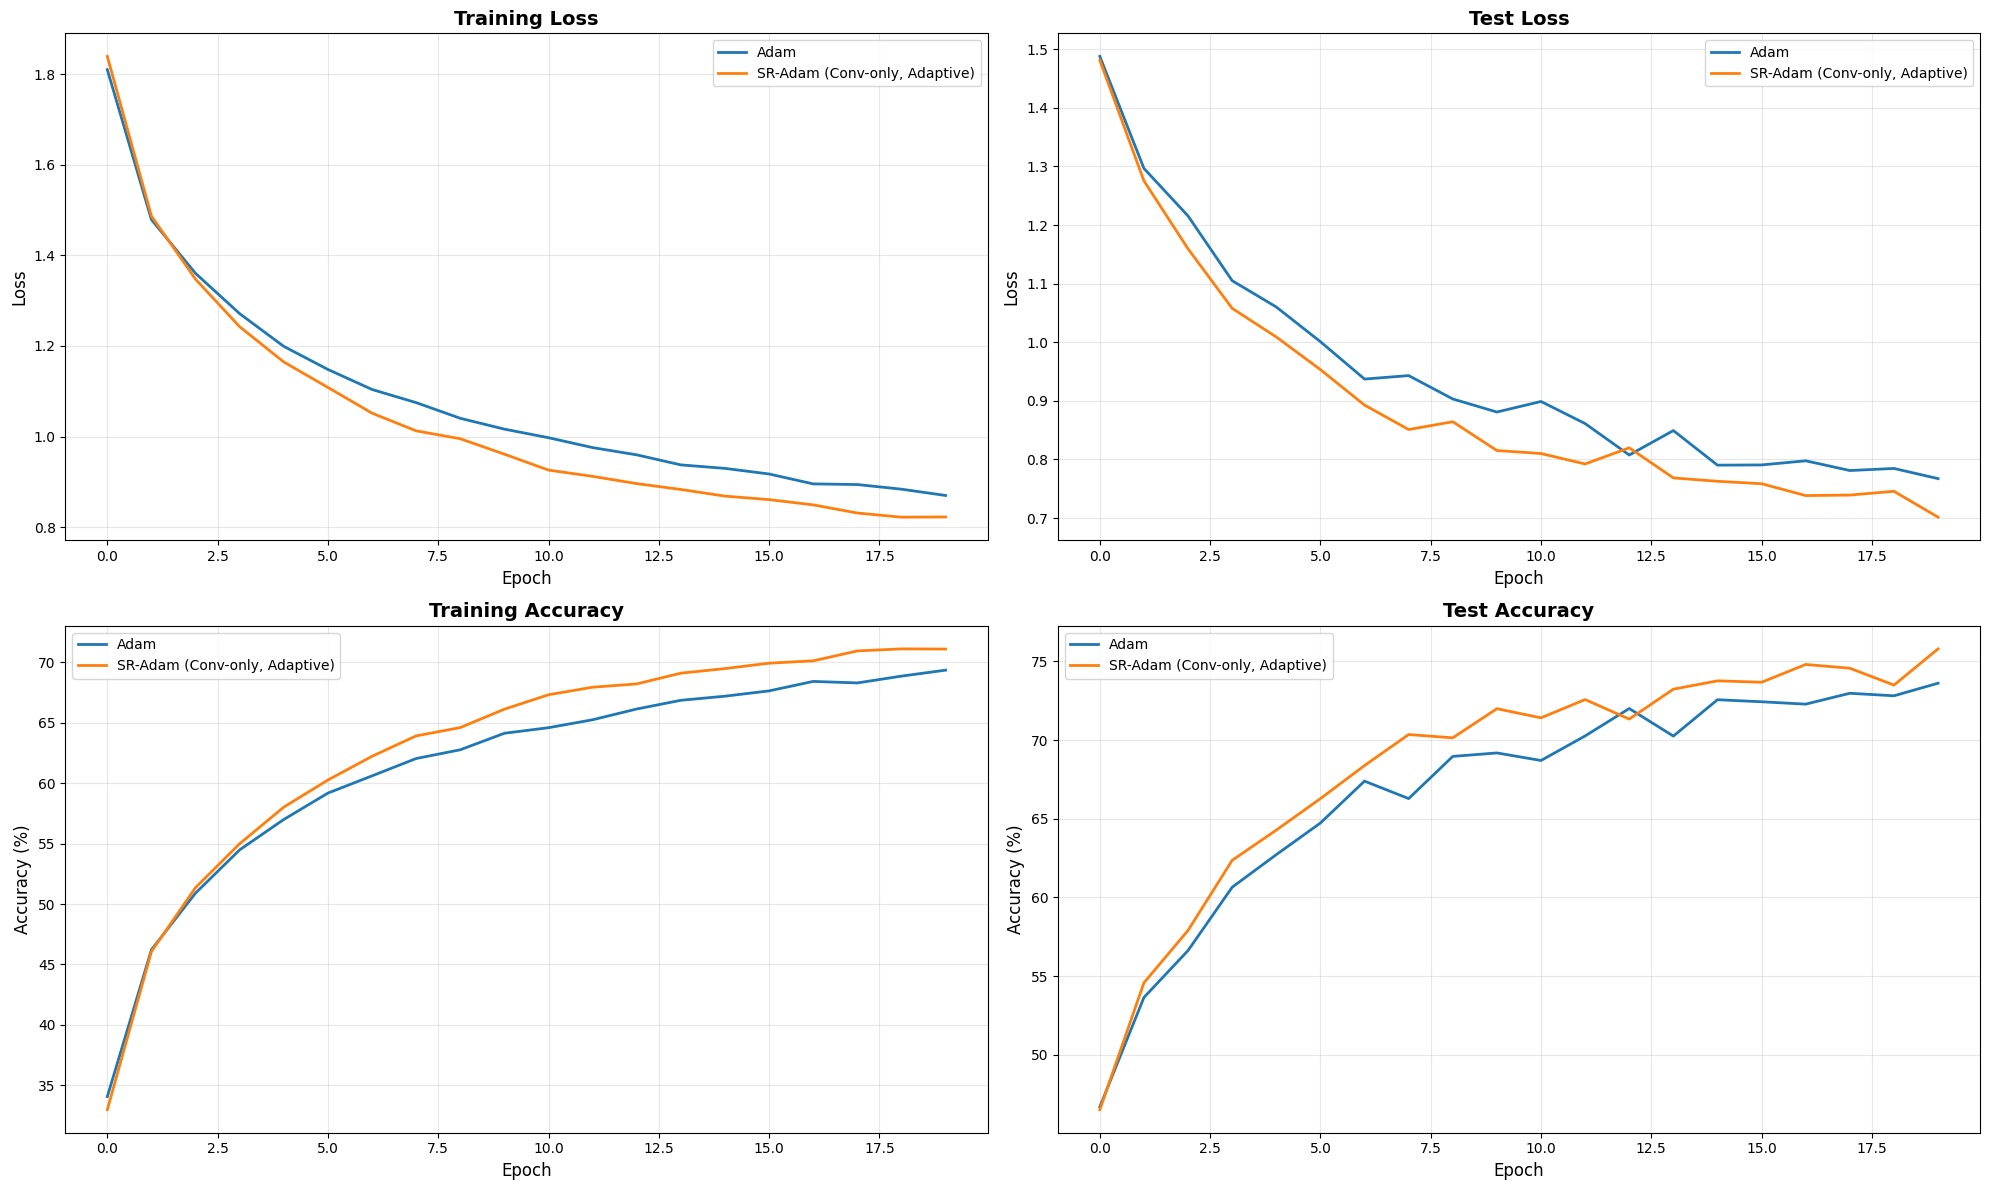


FINAL SUMMARY (mean ± std over runs)
Adam: 72.59 ± 0.92 (best: 73.20 ± 0.50)
SR-Adam (Conv-only, Adaptive): 75.21 ± 0.63 (best: 75.37 ± 0.62)


In [1]:
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam"

In [ ]:
# %run main.py --dataset CIFAR10 --batch_size 512 --num_epochs 20 --noise 0.1

In [ ]:
# %run main.py --dataset CIFAR100 --batch_size 512 --num_epochs 20 --noise 0.1